<a href="https://colab.research.google.com/github/ifurther/stocker-python/blob/master/%E8%B6%85%E7%B0%A1%E5%96%AE%E5%8F%B0%E8%82%A1%E6%AF%8F%E6%97%A5%E7%88%AC%E8%9F%B2%E6%95%99%E5%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import sqlite3
import datetime,time
#import xlwings as xw

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgIBuLw80cwNUQHJ_YMqIvXC0hPDexvR8qCzyBKp1sGTV9z_iymnp8
Mounted at /content/gdrive


In [ ]:
gd_db_file = '/content/gdrive/MyDrive/twstock/twstock.db'

# generate sqlite file

In [ ]:
conn = sqlite3.connect(gd_db_file)
c = conn.cursor()

c.execute("CREATE TABLE contacts2 (date text, name text, number text,證券名稱 text)")

conn.commit()
conn.close()

OperationalError: ignored

In [ ]:
conn = sqlite3.connect(gd_db_file)
c = conn.cursor()
len(list(c.execute('SELECT * FROM contacts2 ORDER BY number')))
query = """
  SELECT
   *
  FROM twstock
"""
query = """
  SELECT * FROM twstock ORDER BY datetime ASC
"""
data_db = pd.read_sql_query(
    query,
    conn,
    parse_dates={'datetime': '%Y-%m-%d %H:%M:%S'},
    index_col='datetime')

In [ ]:
def crawl_price(date):
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + str(date).split(' ')[0].replace('-','') + '&type=ALL')
    ret = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                        for i in r.text.split('\n') 
                                        if len(i.split('",')) == 17 and i[0] != '='])), header=0)
    ret = ret.set_index('證券代號')
    ret['成交金額'] = ret['成交金額'].str.replace(',','')
    ret['成交股數'] = ret['成交股數'].str.replace(',','')
    return ret

In [ ]:
data = {}
n_days = 30
date = datetime.datetime.now() 
fail_count = 0
allow_continuous_fail_count = 5
while len(data) < n_days:

    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data[date.date()] = crawl_price(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break
    
    # 減一天
    date -= datetime.timedelta(days=1)
    time.sleep(10)


parsing 2021-11-06 12:35:23.203727
fail! check the date is holiday
parsing 2021-11-05 12:35:23.203727
success!
parsing 2021-11-04 12:35:23.203727
success!
parsing 2021-11-03 12:35:23.203727
success!
parsing 2021-11-02 12:35:23.203727
success!
parsing 2021-11-01 12:35:23.203727
success!
parsing 2021-10-31 12:35:23.203727
fail! check the date is holiday
parsing 2021-10-30 12:35:23.203727
fail! check the date is holiday
parsing 2021-10-29 12:35:23.203727
success!
parsing 2021-10-28 12:35:23.203727
success!
parsing 2021-10-27 12:35:23.203727
success!
parsing 2021-10-26 12:35:23.203727
success!
parsing 2021-10-25 12:35:23.203727
success!
parsing 2021-10-24 12:35:23.203727
fail! check the date is holiday
parsing 2021-10-23 12:35:23.203727
fail! check the date is holiday
parsing 2021-10-22 12:35:23.203727
success!
parsing 2021-10-21 12:35:23.203727
success!
parsing 2021-10-20 12:35:23.203727
success!
parsing 2021-10-19 12:35:23.203727
success!
parsing 2021-10-18 12:35:23.203727
success!
parsi

In [ ]:
data

{datetime.date(2021, 9, 24):        證券名稱      成交股數    成交筆數        成交金額  ...  最後揭示賣價 最後揭示賣量    本益比 Unnamed: 16
 證券代號                                       ...                                  
 1101     台泥  13566958   6,061   697185968  ...   51.30     23  12.60         NaN
 1101B  台泥乙特      2172       4      112140  ...   51.70      1   0.00         NaN
 1102     亞泥   8006524   3,473   372124668  ...   46.45    147   9.20         NaN
 1103     嘉泥    362021     206     7563989  ...   20.85     10   8.67         NaN
 1104     環泥    339654     232     7228405  ...   21.20      8  10.63         NaN
 ...     ...       ...     ...         ...  ...     ...    ...    ...         ...
 9944     新麗     91791      55     1908095  ...   20.85      9  22.91         NaN
 9945    潤泰新  21938437  15,183  1324387261  ...   59.80     97   6.17         NaN
 9946   三發地產    269561     162     4485321  ...   16.60      3  75.23         NaN
 9955     佳龍     54851      96      917258  ...   16.75     11   0.00 

# K & D

In [ ]:
d_close = pd.DataFrame({k:d['收盤價'] for k,d in data.items()}).transpose()
d_close.index = pd.to_datetime(d_close.index)

d_open = pd.DataFrame({k:d['開盤價'] for k,d in data.items()}).transpose()
d_open.index = pd.to_datetime(d_open.index)

d_high = pd.DataFrame({k:d['最高價'] for k,d in data.items()}).transpose()
d_high.index = pd.to_datetime(d_high.index)

d_low = pd.DataFrame({k:d['最低價'] for k,d in data.items()}).transpose()
d_low.index = pd.to_datetime(d_low.index)

d_volume = pd.DataFrame({k:d['成交股數'] for k,d in data.items()}).transpose()
d_volume.index = pd.to_datetime(d_volume.index)

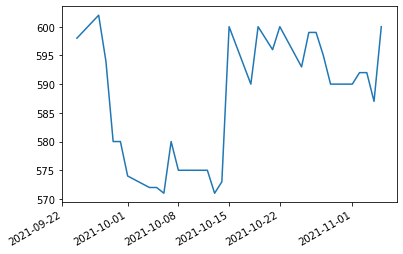

In [ ]:
year = '{}'.format(datetime.datetime.now().year)
tsmc = {
    'close':d_close['2330'][year].dropna().astype(float),
    'open':d_open['2330'][year].dropna().astype(float),
    'high':d_high['2330'][year].dropna().astype(float),
    'low':d_low['2330'][year].dropna().astype(float),
    'volume': d_volume['2330'][year].dropna().astype(float),
}

tsmc['close'].plot()

In [ ]:
#KD指標
from talib import abstract

def talib2df(talib_output):
    if type(talib_output) == list:
        ret = pd.DataFrame(talib_output).transpose()
    else:
        ret = pd.Series(talib_output)
    ret.index = tsmc['close'].index
    return ret;

talib2df(abstract.STOCH(tsmc)).plot()
tsmc['close'].plot(secondary_y=True)

ModuleNotFoundError: ignored

# get one day data

In [ ]:
data[datetime.date(2020, 6, 10)].columns

KeyError: ignored

In [ ]:
    r=requests.post('https://www.twse.com.tw/en/exchangeReport/STOCK_FIRST?response=csv&date=20200612')
    ret = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                        for i in r.text.split('\n') 
                                        if len(i.split('",')) == 17 and i[0] != '='])), header=0)

In [ ]:
ret

,TOTAL,TOTAL.1,"93,462,478","59,543","11,361,683,777",Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16


In [ ]:
data_m = pd.concat(data)
data_m.index.names=['datetime','證券代號']

In [ ]:
conn = sqlite3.connect(gd_db_file)
data_m.to_sql('twstock',con=conn, if_exists='append')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
timeindex = pd.to_datetime(data_db.index).date.tolist()

In [ ]:
timeindex=list(set(timeindex))

In [ ]:
data = {}
n_days = 90
date = datetime.datetime.now() 
fail_count = 0
allow_continuous_fail_count = 5
while len(data) < n_days and date.date() not in timeindex:

    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data[date.date()] = crawl_price(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break
    
    # 減一天
    date -= datetime.timedelta(days=1)
    time.sleep(10)

parsing 2021-11-15 08:48:21.861446
success!
parsing 2021-11-14 08:48:21.861446
fail! check the date is holiday
parsing 2021-11-13 08:48:21.861446
fail! check the date is holiday
parsing 2021-11-12 08:48:21.861446
success!
parsing 2021-11-11 08:48:21.861446
success!
parsing 2021-11-10 08:48:21.861446
success!
parsing 2021-11-09 08:48:21.861446
success!
parsing 2021-11-08 08:48:21.861446
success!
parsing 2021-11-07 08:48:21.861446
fail! check the date is holiday
parsing 2021-11-06 08:48:21.861446
fail! check the date is holiday
parsing 2021-11-05 08:48:21.861446
success!
parsing 2021-11-04 08:48:21.861446
success!
parsing 2021-11-03 08:48:21.861446
success!
parsing 2021-11-02 08:48:21.861446
success!
parsing 2021-11-01 08:48:21.861446
success!
parsing 2021-10-31 08:48:21.861446
fail! check the date is holiday
parsing 2021-10-30 08:48:21.861446
fail! check the date is holiday
parsing 2021-10-29 08:48:21.861446
success!
parsing 2021-10-28 08:48:21.861446
success!
parsing 2021-10-27 08:48:2

# workday generate

In [2]:
!pip install workalendar
from workalendar.asia import Taiwan


     |████████████████████████████████| 205 kB 5.4 MB/s 
     |████████████████████████████████| 70 kB 8.2 MB/s 


In [6]:
cal = Taiwan()
cal.holidays(2021)
cal.is_holiday

(5, 6)

In [14]:
pd.io.json.read_json('https://data.ntpc.gov.tw/api/datasets/308DCD75-6434-45BC-A95F-584DA4FED251/json?page=1&size=10000')

,date,name,isHoliday,holidayCategory,description
0,2021-04-25,,是,星期六、星期日,
1,2021-05-01,,是,星期六、星期日,
2,2021-05-02,,是,星期六、星期日,
3,2021-05-08,,是,星期六、星期日,
4,2021-05-09,,是,星期六、星期日,
...,...,...,...,...,...
188,2022-12-17,,是,星期六、星期日,
189,2022-12-18,,是,星期六、星期日,
190,2022-12-24,,是,星期六、星期日,
191,2022-12-25,,是,星期六、星期日,


In [16]:
pd.io.json.read_json('https://data.ntpc.gov.tw/api/datasets/308DCD75-6434-45BC-A95F-584DA4FED251/json?page=50&size=100')

""


In [17]:
pd.io.json.read_json('https://data.ntpc.gov.tw/api/datasets/308DCD75-6434-45BC-A95F-584DA4FED251')

,result,success
authorize,政府資料開放授權條款-第1版,True
categoryNDCDesc,公共資訊,True
categoryName,資訊,True
childrenData,[],True
contactEmail,AQ0926@ntpc.gov.tw,True
contactName,陳先生,True
contactTel,4375,True
dataCount,1193,True
description,政府行政機關辦公日曆表。,True
fieldDescription,date(日期)、name(節日或紀念日名稱)、isHoliday(是否放假)、holida...,True


# Not unsed

In [ ]:
workdayfile = 'https://www.dgpa.gov.tw/FileConversion?filename=dgpa/files/202005/afc7433b-9c13-44ce-9382-b2515dad814e.xls&nfix=&name=110%e5%b9%b4%e8%be%a6%e5%85%ac%e6%97%a5%e6%9b%86%e8%a1%a8.xls'

In [ ]:
import requests
f=requests.get(workdayfile)

In [ ]:
pd.read_excel(workdayfile,skiprows=2)

In [ ]:
import re
import requests
import urllib
from urllib.parse import urlparse
import urllib.request

workdayfile = u'https://www.dgpa.gov.tw/FileConversion?filename=dgpa/files/202005/afc7433b-9c13-44ce-9382-b2515dad814e.xls&nfix=&name=110%e5%b9%b4%e8%be%a6%e5%85%ac%e6%97%a5%e6%9b%86%e8%a1%a8.xls'
url=urlparse(workdayfile)
work_file_name=urllib.parse.unquote(url.query.split('&')[-1][5:])
urllib.request.urlretrieve(workdayfile, work_file_name)


('110年辦公日曆表.xls', <http.client.HTTPMessage at 0x7f6bf7c659d0>)

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import lxml, requests
result = requests.get('https://www.dgpa.gov.tw/informationlist?uid=30');
print("encoding: %s" % result.encoding)
print("content: \n%s" % result.text)

encoding: utf-8
content: 



<!doctype html>
<html lang="zh-TW">
<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width , initial-scale=1.0">
    <title>行政院人事行政總處- Directorate-General of Personnel Administration,Executive Yuan-辦公日曆表</title>
    <meta name="keywords" content="行政院人事行政總處- Directorate-General of Personnel Administration,Executive Yuan">
    <meta name="description" content="行政院人事行政總處- Directorate-General of Personnel Administration,Executive Yuan">
    <link rel="icon" href="images/favicon.ico">
    <link href="css/style.css?v=20211115222531" rel="stylesheet" type="text/css">
    <meta http-equiv="X-UA-Compatible" content="IE=9">
    <!-- script -->
    <script src="js/jquery.min.js"></script>
    <script src="js/script.js"></script>
    <style>
           .tab_type a {
            padding: 7px 20px;
            display: block;
            float: left;
            margin: 6px 6px;
            color: #777;
            font-size:1.25em;
     

In [ ]:
import urllib
url='https://www.dgpa.gov.tw/informationlist?uid=30'
urllib.parse.unquote(url)
req = urllib.request.Request(url)
with urllib.request.urlopen(req) as response:
   the_page = response.read().decode('utf-8')
soup = BeautifulSoup(the_page, 'html.parser')

In [ ]:
'關辦公日曆表' in the_page

True

In [ ]:
# 所有的超連結
a_tags = soup.find_all('div' id="content")
for tag in a_tags:
  # 輸出超連結的文字
  print(tag.string)

None
None
None
English
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [ ]:
from openpyxl import load_workbook
import xlrd
from pathlib import Path

if '.xls' in Path(work_file_name).suffixes:
  wb = xlrd.open_workbook(work_file_name)
  ws = wb.sheets()[0]
else:
  wb = load_workbook(filename=work_file_name, 
                   read_only=True)
  ws = wb['Sheet1']

# Read the cell values into a list of lists
data_rows = []
for row in ws['A3':'D20']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)

# Transform into dataframe
import pandas as pd
df = pd.DataFrame(data_rows)

TypeError: ignored

In [ ]:

for n in range(len(wb.sheet_names())):
    table = wb.sheets()[n]
    sh = table
    print(n)
    print("{0} {1} {2}".format(sh.name, sh.nrows, sh.ncols))
    print("Cell B4 is {0}".format(sh.cell_value(rowx=3, colx=2)))
    print("Cell A4 is {0}".format(sh.cell_value(rowx=3, colx=1)))
    print("Cell B4 is {0}".format(sh.cell_value(rowx=3, colx=7)))

    for i in range(table.nrows):
        print('Page {}: '.format(n), end='')
        print(table.row_values(i))

0
Sheet1 60 25
Cell B4 is 一
Cell A4 is 日
Cell B4 is 六
Page 0: ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
Page 0: ['', '    中華民國110年（西元2021年）政府行政機關辦公日曆表', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
Page 0: ['', '', '', '一', '', '月', '', '', '', '', '二', '', '月', '', '', '', '', '三', '', '月', '', '', '', '', '']
Page 0: ['', '日', '一', '二', '三', '四', '五', '六', '日', '一', '二', '三', '四', '五', '六', '日', '一', '二', '三', '四', '五', '六', '', '', '']
Page 0: ['', '', '', '', '', '', 1.0, 2.0, '', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, '', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, '', '', '']
Page 0: ['', '', '', '', '', '', '十八', '十九', '', '二十', '廿一', '立春', '廿三', '廿四', '廿五', '', '十八', '十九', '二十', '廿一', '驚蟄', '廿三', '', '', '']
Page 0: ['', 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, '', '', '']
Page 0: ['', '二十', '廿一', '小寒', '廿三', '廿四', '廿五', '廿六'